<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: black"> 
    <b> <center> About Data </center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h4>
    Loading The Dataset to Pandas DataFrame</h4>
<div>    

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
pd.set_option('display.max.rows', 285000)
pd.set_option('display.max.columns', 31)

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h4>
    Dataset Informations</h4>
<div>    

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape
print('Number of rows: ', data.shape[0])
print('Number of columns: ', data.shape[1])

Number of rows:  284807
Number of columns:  31


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h4>
    Cheacking The No. of Missing Values In Each Columns</h4>
<div>    

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [10]:
data = data.drop('Time', axis=1)

In [11]:
data.duplicated().any()

True

In [12]:
data = data.drop_duplicates()
data.shape

(275663, 30)

In [13]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [14]:
X = data.drop('Class', axis=1)
y = data['Class']

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h3>
    Undersampling</h3>
<div>    

In [15]:
normal = data[data['Class'] == 0]
fraud  = data[data['Class'] == 1]

In [16]:
normal.shape

(275190, 30)

In [17]:
fraud.shape

(473, 30)

In [18]:
normal_sample = normal.sample(n=473)
normal_sample.shape

(473, 30)

In [19]:
new_data = pd.concat([normal_sample, fraud], ignore_index=True)

In [20]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [21]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.175850,-1.530406,-0.769368,-1.739537,-1.164240,-0.152538,-1.244073,-0.114391,-1.284970,1.513063,-0.987101,-0.451687,1.669037,-0.653646,0.669834,0.068010,-0.012525,-0.013953,-0.250780,-0.181997,-0.313356,-0.641436,0.380720,0.220614,-0.571176,-0.490616,0.023830,-0.017705,-0.021388,0
1,0.326475,0.426514,-0.542141,1.339055,0.374699,-0.624327,0.822006,-1.125693,-0.260978,-0.035635,-1.281496,-0.649863,-1.709739,0.996558,-0.009637,-0.974931,0.286371,-0.280533,0.526234,-0.088761,0.880692,-0.077390,-0.416303,-0.097391,0.926578,-0.278229,0.189291,0.275505,0.188591,0
2,1.098941,-0.217296,0.879119,0.407290,-0.763280,-0.116806,-0.493593,0.104219,0.198131,0.031610,1.129252,0.978775,0.555722,0.087400,0.691223,0.940854,-0.964166,0.570664,0.022462,0.076215,0.062405,0.060594,-0.042593,0.047146,0.159079,0.387633,-0.018502,0.023074,-0.116383,0
3,-0.556958,2.719714,-2.773678,1.697806,0.103893,-1.238886,-0.968124,-1.953080,-1.231574,-1.868203,2.320183,0.976055,0.162422,-2.428584,0.151346,1.345118,3.084237,1.984975,-0.375788,0.535402,-1.227153,0.409263,0.428955,0.181249,-0.531905,-0.457988,-0.165141,-0.082507,-0.326082,0
4,-0.178015,-4.265168,-0.002542,-0.550070,-2.293388,1.834582,-0.839544,0.311880,-0.642885,0.773378,-0.643168,-0.031028,0.057126,-1.089042,-2.400504,-0.950252,1.061296,0.138214,0.679889,1.289907,0.029360,-0.952758,-0.786392,-1.110701,0.101321,-0.212353,-0.049266,0.145796,2.985173,0


In [22]:
X = new_data.drop('Class', axis=1)
y = new_data['Class']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=101)

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h3>
    Logistic Regression</h3>
<div>    

In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = log.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [29]:
precision_score(y_test, y_pred)

0.9230769230769231

In [30]:
recall_score(y_test, y_pred)

1.0

In [31]:
f1_score(y_test, y_pred)

0.9600000000000001

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h3>
    Decision Tree Classifier</h3>
<div>    

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred2 = dt.predict(X_test)

In [34]:
accuracy_score(y_pred2, y_test)

0.9666666666666667

In [35]:
precision_score(y_pred2, y_test)

1.0

In [36]:
recall_score(y_pred2, y_test)

0.9230769230769231

In [37]:
f1_score(y_pred2, y_test)

0.9600000000000001

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h3>
    Random Forest Classifier</h3>
<div>    

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = rf.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred3)

0.9666666666666667

In [41]:
precision_score(y_test, y_pred3)

0.9230769230769231

In [42]:
recall_score(y_test, y_pred3)

1.0

In [43]:
f1_score(y_test, y_pred3)

0.9600000000000001

In [44]:
final_data = pd.DataFrame({'Models': ['LR', 'DT', 'RF'], 
              'ACC': [
                  accuracy_score(y_test, y_pred)*100,
                  accuracy_score(y_test, y_pred2)*100,
                  accuracy_score(y_test, y_pred3)*100
              ]
             })

In [45]:
final_data

,Models,ACC
0,LR,96.666667
1,DT,96.666667
2,RF,96.666667


<Axes: xlabel='Models', ylabel='ACC'>

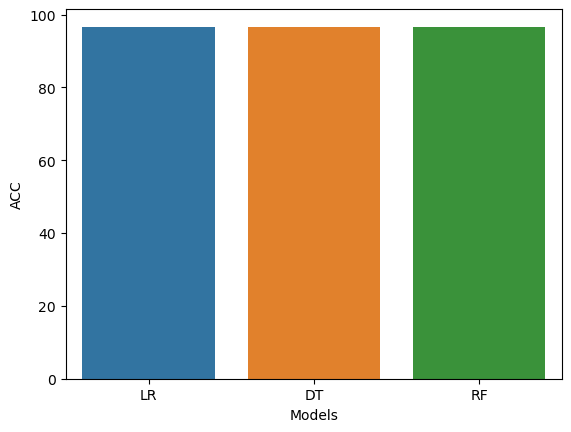

In [82]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h3>
    Oversampling</h3>
<div>    

In [47]:
X = data.drop('Class', axis=1)
y = data['Class']

In [48]:
X.shape

(275663, 29)

In [49]:
y.shape

(275663,)

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [61]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=30, random_state=101)

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h3>
    Logistic Regression</h3>
<div>    

In [63]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [64]:
y_pred1 = log.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred1)

0.9666666666666667

In [66]:
precision_score(y_test, y_pred1)

1.0

In [67]:
recall_score(y_test, y_pred1)

0.9444444444444444

In [68]:
f1_score(y_test, y_pred1)

0.9714285714285714

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h3>
    Decision Tree Classifier</h3>
<div>    

In [69]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
y_pred2 = dt.predict(X_test)

In [71]:
accuracy_score(y_test, y_pred2)

1.0

In [72]:
precision_score(y_test, y_pred2)

1.0

In [73]:
f1_score(y_test, y_pred2)

1.0

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h3>
    Random Forest Classifier</h3>
<div>    

In [74]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_pred3 = rf.predict(X_test)

In [76]:
accuracy_score_score_scoreacy_scoreuracy_score(y_test, y_pred3)

1.0

In [77]:
precision_score(y_test, y_pred3)

1.0

In [78]:
f1_score(y_test, y_pred3)

1.0

In [84]:
final_data = pd.DataFrame({'Models': ['LR', 'DT', 'RF'], 
              'ACC': [
                  accuracy_score(y_test, y_pred1)*100,
                  accuracy_score(y_test, y_pred2)*100,
                  accuracy_score(y_test, y_pred3)*100
              ]
             })

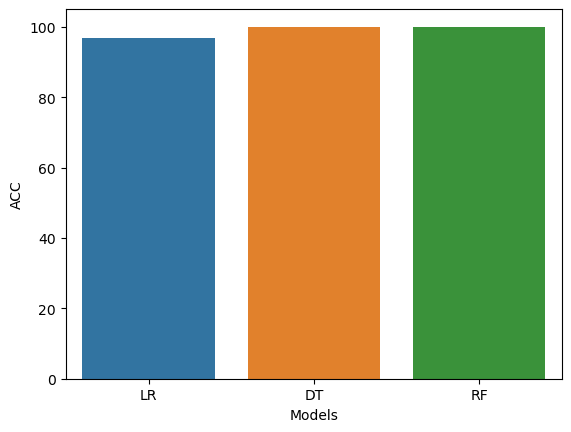

In [85]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])
plt.show()

<div style="font-size: 13pt; font-family: verdana; color: #08415C"><h3>
    Save the Model</h3>
<div>    

In [86]:
dt = DecisionTreeClassifier()
dt.fit(X_res, y_res)

DecisionTreeClassifier()

In [97]:
import joblib 
joblib.dump(dt, 'credit_card_model')

['credit_card_model']

In [106]:
model = joblib.load('credit_card_model')
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
pred

C:\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [107]:
if pred == 0:
    print('Normal transaction')
else:
    print('Fraudulent transaction')

Normal transaction
